# HW 1: Rare Disease Article Traffic Analysis

## 1. Data Acquisition

In this step, we acquire page view data using the [Wikimedia Analytics API](https://doc.wikimedia.org/generated-data-platform/aqs/analytics-api/reference/page-views.html). The goal is to collect traffic data from Wikipedia articles related to rare diseases between 2015 and 2024. The articles are selected based on a list derived from the [National Organization for Rare Diseases (NORD)](https://rarediseases.org).

The data is separated into three categories:
- **Mobile**: Pageviews from mobile devices (mobile web and app combined).
- **Desktop**: Pageviews from desktop devices.
- **Cumulative**: Total pageviews combining both mobile and desktop traffic.

### Data Sources:
- [Wikimedia Analytics API - Pageviews](https://doc.wikimedia.org/generated-data-platform/aqs/analytics-api/reference/page-views.html)
- NORD [database](https://rarediseases.org) of rare diseases
- Selected subset of rare disease [CSV File](https://github.com/trishaprasant/data-512-homework_1/blob/main/rare-disease_cleaned.AUG.2024.csv)

First, I imported relevant libraries.

In [13]:
import csv
import json
import time
import urllib.parse
import requests
from collections import defaultdict
from tqdm import tqdm  # Import tqdm for the progress bar
import matplotlib.pyplot as plt

Next, I'll set the constants to make the code more readable.

In [11]:
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'
REQUEST_HEADERS = {
    'User-Agent': '<trishp3@uw.edu>, University of Washington, MSDS DATA 512 - AUTUMN 2024',
}
START_DATE = '20150701'  # YYYYMMDD format
END_DATE = '20240901'    # YYYYMMDD format
API_LATENCY_ASSUMED = 0.002
API_THROTTLE_WAIT = (1.0/100.0) - API_LATENCY_ASSUMED

Fetching data for article: Klinefelter syndrome


Fetching data for article: Aarskog–Scott syndrome


Fetching data for article: Abetalipoproteinemia


Fetching data for article: MT-TP


Fetching data for article: Ablepharon macrostomia syndrome


Fetching data for article: Acanthocheilonemiasis


Fetching data for article: Acanthosis nigricans


Fetching data for article: Aceruloplasminemia


Fetching data for article: Megaesophagus


Fetching data for article: Achard–Thiers syndrome


Fetching data for article: Achondrogenesis


Fetching data for article: Achondroplasia


Fetching data for article: Dwarfism


Fetching data for article: Osteochondrodysplasia


Fetching data for article: Fibroblast growth factor receptor 3


Fetching data for article: Vestibular schwannoma


Fetching data for article: Brain tumor


Fetching data for article: Acquired generalized lipodystrophy


Fetching data for article: Barraquer–Simons syndrome


Fetching data for article: Acrodermatitis enteropathica


Fetching data for article: Zinc deficiency


Fetching data for article: Brown-Séquard syndrome


Fetching data for article: Spinal cord injury


Fetching data for article: Brucellosis


Fetching data for article: Yellowstone Park bison herd


Fetching data for article: Māui dolphin


Fetching data for article: Brugada syndrome


Fetching data for article: Nav1.8


Fetching data for article: Sports cardiology


Fetching data for article: Budd–Chiari syndrome


Fetching data for article: Thrombosis


Fetching data for article: Hepatic veno-occlusive disease


Fetching data for article: Thromboangiitis obliterans


Fetching data for article: Bullous pemphigoid


Fetching data for article: Pemphigoid


Fetching data for article: Trigonocephaly


Fetching data for article: CADASIL


Fetching data for article: Campomelic dysplasia


Fetching data for article: Camurati–Engelmann disease


Fetching data for article: Canavan disease


Fetching data for article: Spongy degeneration of the central nervous system


Fetching data for article: Candidiasis


Fetching data for article: Breastfeeding difficulties


Fetching data for article: Cerebral autosomal recessive arteriopathy with subcortical infarcts and leukoencephalopathy


Fetching data for article: Carcinoid syndrome


Fetching data for article: Enterochromaffin cell


Fetching data for article: Cardiofaciocutaneous syndrome


Fetching data for article: RASopathy


Fetching data for article: Carney complex


Fetching data for article: Pituitary adenoma


Fetching data for article: Carnosinemia


Fetching data for article: Caroli disease


Fetching data for article: Carpenter syndrome


Fetching data for article: Castleman disease


Fetching data for article: Cat eye syndrome


Fetching data for article: Chromosome 22


Fetching data for article: Small supernumerary marker chromosome


Fetching data for article: Catamenial pneumothorax


Fetching data for article: Tumor-like disorders of the lung pleura


Fetching data for article: Catel–Manzke syndrome


Fetching data for article: Caudal regression syndrome


Fetching data for article: Cavernous hemangioma


Fetching data for article: CDKL5 deficiency disorder


Fetching data for article: Central core disease


Fetching data for article: Central diabetes insipidus


Fetching data for article: Hypothalamic disease


Fetching data for article: Central pain syndrome


Fetching data for article: Zona incerta


Fetching data for article: Centronuclear myopathy


Fetching data for article: Cerebellar agenesis


Fetching data for article: Cerebral folate deficiency


Fetching data for article: Kearns–Sayre syndrome


Fetching data for article: Cerebral palsy


Fetching data for article: Palsy


Fetching data for article: Toe walking


Fetching data for article: Multiple birth


Fetching data for article: T37 (classification)


Fetching data for article: T36 (classification)


Fetching data for article: T38 (classification)


Fetching data for article: Adaptive Physical Education Australia


Fetching data for article: Horseback riding simulators


Fetching data for article: T34 (classification)


Fetching data for article: Augmentative and alternative communication


Fetching data for article: Green ribbon


Fetching data for article: Functional electrical stimulation


Fetching data for article: S10 (classification)


Fetching data for article: T35 (classification)


Fetching data for article: ERCC1


Fetching data for article: Spasmodic torticollis


Fetching data for article: Botulinum toxin


Fetching data for article: Torticollis


Fetching data for article: Neutral lipid storage disease


Fetching data for article: Iridocorneal endothelial syndrome


Fetching data for article: Charcot–Marie–Tooth disease


Fetching data for article: Rheobase


Fetching data for article: Hereditary motor and sensory neuropathy


Fetching data for article: CHARGE syndrome


Fetching data for article: Deaf plus


Fetching data for article: Coloboma


Fetching data for article: Hyperprolactinaemia


Fetching data for article: Chikungunya


Fetching data for article: Mosquito-borne disease


Fetching data for article: Macrophage


Fetching data for article: 2007 in Africa


Fetching data for article: Julie Ledgerwood


Fetching data for article: 2006 in Africa


Fetching data for article: Cholangiocarcinoma


Fetching data for article: Bile duct


Fetching data for article: Pancreaticoduodenectomy


Fetching data for article: Ultrasonography of liver tumors


Fetching data for article: Cholera


Fetching data for article: Diseases and epidemics of the 19th century


Fetching data for article: Pandemic


Fetching data for article: Thomas Shapter


Fetching data for article: Persian famine of 1917–1919


Fetching data for article: Lysosomal acid lipase deficiency


Fetching data for article: Calcium pyrophosphate dihydrate crystal deposition disease


Fetching data for article: Chordoma


Fetching data for article: Cervicocranial syndrome


Fetching data for article: Choroideremia


Fetching data for article: Rab (G-protein)


Fetching data for article: Gene therapy of the human retina


Fetching data for article: Ring chromosome 18


Fetching data for article: 18p-


Fetching data for article: 18p


Fetching data for article: Tetrasomy


Fetching data for article: Chromosome 18


Fetching data for article: DiGeorge syndrome


Fetching data for article: Genocopy


Fetching data for article: Chromosome 5


Fetching data for article: Chromosome 7


Fetching data for article: Monosomy 9p


Fetching data for article: Tetrasomy 9p


Fetching data for article: Chromosome 9


Fetching data for article: Chronic granulomatous disease


Fetching data for article: Lentiviral vector in gene therapy


Fetching data for article: Sialadenitis


Fetching data for article: Chronic inflammatory demyelinating polyneuropathy


Fetching data for article: Chronic lymphocytic leukemia


Fetching data for article: Alemtuzumab


Fetching data for article: Virtual karyotype


Fetching data for article: Mir-181 microRNA precursor


Fetching data for article: Chronic myelogenous leukemia


Fetching data for article: Imatinib


Fetching data for article: Musashi-2


Fetching data for article: Eosinophilic granulomatosis with polyangiitis


Fetching data for article: Zafirlukast


Fetching data for article: Scarring hair loss


Fetching data for article: Pseudopelade of Brocq


Fetching data for article: Ciguatera fish poisoning


Fetching data for article: Citrullinemia


Fetching data for article: Argininosuccinate synthase


Fetching data for article: Infantile neuronal ceroid lipofuscinosis


Fetching data for article: Cleidocranial dysostosis


Fetching data for article: Tooth eruption


Fetching data for article: RUNX2


Fetching data for article: Gas gangrene


Fetching data for article: CLOVES syndrome


Fetching data for article: Cluster headache


Fetching data for article: Triptan


Fetching data for article: Demand valve oxygen therapy


Fetching data for article: Cockayne syndrome


Fetching data for article: ERCC6


Fetching data for article: Transneuronal degeneration


Fetching data for article: Coffin–Lowry syndrome


Fetching data for article: Coffin–Siris syndrome


Fetching data for article: Cohen syndrome


Fetching data for article: VPS13B


Fetching data for article: Cold agglutinin disease


Fetching data for article: Ii antigen system


Fetching data for article: Cold antibody hemolytic anemia


Fetching data for article: Colorado tick fever


Fetching data for article: Common variable immunodeficiency


Fetching data for article: Immunodeficiency


Fetching data for article: Complex regional pain syndrome


Fetching data for article: Cone dystrophy


Fetching data for article: Congenital adrenal hyperplasia


Fetching data for article: 21-Hydroxylase


Fetching data for article: Hyperandrogenism


Fetching data for article: Cell-free fetal DNA


Fetching data for article: Neurosexism


Fetching data for article: Congenital afibrinogenemia


Fetching data for article: Fibrinogen


Fetching data for article: Congenital bilateral perisylvian syndrome


Fetching data for article: Congenital contractural arachnodactyly


Fetching data for article: Gunther disease


Fetching data for article: Congenital fiber type disproportion


Fetching data for article: Congenital fibrosis of the extraocular muscles


Fetching data for article: Congenital generalized lipodystrophy


Fetching data for article: Seipin


Fetching data for article: Congenital heart block


Fetching data for article: Congenital hepatic fibrosis


Fetching data for article: Congenital hyperinsulinism


Fetching data for article: Nesidioblastosis


Fetching data for article: Congenital lactic acidosis


Fetching data for article: Congenital muscular dystrophy


Fetching data for article: Omigapil


Fetching data for article: Neuromuscular junction


Fetching data for article: Congenital myopathy


Fetching data for article: Hypoplasminogenemia


Fetching data for article: Sucrose intolerance


Fetching data for article: Congenital syphilis


Fetching data for article: Chickenpox


Fetching data for article: Conradi–Hünermann syndrome


Fetching data for article: Cor triatriatum


Fetching data for article: Epithelial basement membrane dystrophy


Fetching data for article: Macular corneal dystrophy


Fetching data for article: Meesmann corneal dystrophy


Fetching data for article: Schnyder crystalline corneal dystrophy


Fetching data for article: Posterior polymorphous corneal dystrophy


Fetching data for article: Cornelia de Lange syndrome


Fetching data for article: SMC1A


Fetching data for article: Establishment of sister chromatid cohesion


Fetching data for article: SMC3


Fetching data for article: CDLS


Fetching data for article: Corticobasal degeneration


Fetching data for article: Costello syndrome


Fetching data for article: HRAS


Fetching data for article: Craniofrontonasal dysplasia


Fetching data for article: Craniometaphyseal dysplasia


Fetching data for article: Craniopharyngioma


Fetching data for article: Creatine transporter defect


Fetching data for article: Creutzfeldt–Jakob disease


Fetching data for article: Mepacrine


Fetching data for article: Cri du chat syndrome


Fetching data for article: Crigler–Najjar syndrome


Fetching data for article: Cronkhite–Canada syndrome


Fetching data for article: Crouzon syndrome


Fetching data for article: Cryptococcosis


Fetching data for article: Granuloma


Fetching data for article: List of pathology mnemonics


Fetching data for article: Cutis laxa


Fetching data for article: Cutis marmorata telangiectatica congenita


Fetching data for article: Cyclic neutropenia


Fetching data for article: Elastase


Fetching data for article: Cyclic vomiting syndrome


Fetching data for article: Ondansetron


Fetching data for article: Health of Charles Darwin


Fetching data for article: Abdominal migraine


Fetching data for article: Cystic fibrosis


Fetching data for article: Bronchiectasis


Fetching data for article: Glutathione


Fetching data for article: Dornase alfa


Fetching data for article: Kin Canada


Fetching data for article: Orphan drug


Fetching data for article: Pancreatic disease


Fetching data for article: Genetic heterogeneity


Fetching data for article: Lingual lipase


Fetching data for article: Lactoferrin


Fetching data for article: Germline mutation


Fetching data for article: Pyocyanin


Fetching data for article: Health among the Amish


Fetching data for article: Frameshift mutation


Fetching data for article: Respiratory therapist


Fetching data for article: Heterozygote advantage


Fetching data for article: Respiratory tract antimicrobial defense system


Fetching data for article: Channel blocker


Fetching data for article: Human disease modifier gene


Fetching data for article: Newborn screening


Fetching data for article: Cardiovascular and pulmonary physiotherapy


Fetching data for article: Cysticercosis


Fetching data for article: Eucestoda


Fetching data for article: Taenia solium


Fetching data for article: Neurocysticercosis


Fetching data for article: Neglected tropical diseases in India


Fetching data for article: Cystinosis


Fetching data for article: CTNS (gene)


Fetching data for article: Cystinuria


Fetching data for article: MT-RNR1


Fetching data for article: MT-TT


Fetching data for article: MT-TR


Fetching data for article: MT-TI


Fetching data for article: MT-TE


Fetching data for article: MT-TK


Fetching data for article: MT-TF


Fetching data for article: MT-TN


Fetching data for article: Dandy–Walker malformation


Fetching data for article: Cerebellar vermis


Fetching data for article: Hydrocephalus


Fetching data for article: Danon disease


Fetching data for article: De Barsy syndrome


Fetching data for article: Degos disease


Fetching data for article: Dengue fever


Fetching data for article: Dengue virus


Fetching data for article: Zac Holtzman


Fetching data for article: Langerhans cell


Fetching data for article: Antibody-dependent enhancement


Fetching data for article: Health in Thailand


Fetching data for article: Health in Singapore


Fetching data for article: Health in Vietnam


Fetching data for article: National Environment Agency


Fetching data for article: Health in Liberia


Fetching data for article: Health in Cambodia


Fetching data for article: Dentin dysplasia


Fetching data for article: Dentinogenesis imperfecta


Fetching data for article: Denys–Drash syndrome


Fetching data for article: Opioid antagonist


Fetching data for article: Dercum's disease


Fetching data for article: Adiposis dolorosa


Fetching data for article: Dermatitis herpetiformis


Fetching data for article: Gluten-related disorders


Fetching data for article: Gluten-sensitive enteropathy–associated conditions


Fetching data for article: Dermatomyositis


Fetching data for article: Polymyositis


Fetching data for article: Aggressive fibromatosis


Fetching data for article: Diamond–Blackfan anemia


Fetching data for article: Ribosomopathy


Fetching data for article: GATA1


Fetching data for article: Congenital hypoplastic anemia


Fetching data for article: Diastrophic dysplasia


Fetching data for article: Diencephalic syndrome


Fetching data for article: Distal myopathy


Fetching data for article: List of neuromuscular disorders


Fetching data for article: DOOR syndrome


Fetching data for article: Acrodysostosis


Fetching data for article: Acromegaly


Fetching data for article: Octreotide


Fetching data for article: Insulin-like growth factor 1


Fetching data for article: Estrogen (medication)


Fetching data for article: Acromesomelic dysplasia


Fetching data for article: Acromicric dysplasia


Fetching data for article: Adrenocorticotropic hormone deficiency


Fetching data for article: Cholecystectomy


Fetching data for article: Acute disseminated encephalomyelitis


Fetching data for article: Acute eosinophilic pneumonia


Fetching data for article: Acute intermittent porphyria


Fetching data for article: Health of Vincent van Gogh


Fetching data for article: Acute myeloid leukemia


Fetching data for article: Fanconi anemia


Fetching data for article: MYH11


Fetching data for article: Acute promyelocytic leukemia


Fetching data for article: Acute respiratory distress syndrome


Fetching data for article: Treatment and management of COVID-19


Fetching data for article: Adams–Oliver syndrome


Fetching data for article: Addison's disease


Fetching data for article: Adrenal gland


Fetching data for article: Adrenocortical hormone


Fetching data for article: Labradoodle


Fetching data for article: Oral pigmentation


Fetching data for article: Melasma


Fetching data for article: Corticotropic cell


Fetching data for article: Adenoid cystic carcinoma


Fetching data for article: Cylindroma


Fetching data for article: Adenylosuccinate lyase deficiency


Fetching data for article: Adie syndrome


Fetching data for article: Ciliary ganglion


Fetching data for article: Helsmoortel-Van der Aa syndrome


Fetching data for article: Neuronal ceroid lipofuscinosis


Fetching data for article: Kufs disease


Fetching data for article: Dracunculiasis


Fetching data for article: Dravet syndrome


Fetching data for article: Duane syndrome


Fetching data for article: Duane-radial ray syndrome


Fetching data for article: Dubin–Johnson syndrome


Fetching data for article: Multidrug resistance-associated protein 2


Fetching data for article: Bilirubin glucuronide


Fetching data for article: Dubowitz syndrome


Fetching data for article: Duchenne muscular dystrophy


Fetching data for article: Antisense therapy


Fetching data for article: Dystrophinopathy


Fetching data for article: Duodenal atresia


Fetching data for article: Annular pancreas


Fetching data for article: Hereditary sensory and autonomic neuropathy


Fetching data for article: Dyskeratosis congenita


Fetching data for article: WRAP53


Fetching data for article: Trevor disease


Fetching data for article: Dystonia


Fetching data for article: Torsion dystonia


Fetching data for article: Hyperkinesia


Fetching data for article: Extrapyramidal symptoms


Fetching data for article: Basal ganglia disease


Fetching data for article: 2009 swine flu pandemic vaccine


Fetching data for article: Sensory-motor coupling


Fetching data for article: Eales disease


Fetching data for article: Ehlers–Danlos syndromes


Fetching data for article: Zebra print ribbon


Fetching data for article: Right-to-left shunt


Fetching data for article: Elephantiasis


Fetching data for article: Ellis–Van Creveld syndrome


Fetching data for article: Emery–Dreifuss muscular dystrophy


Fetching data for article: Emphysema


Fetching data for article: Empty sella syndrome


Fetching data for article: Encephalocele


Fetching data for article: Craniofacial cleft


Fetching data for article: Endocardial fibroelastosis


Fetching data for article: Hypereosinophilic syndrome


Fetching data for article: Pinworm infection


Fetching data for article: Eosinophilia–myalgia syndrome


Fetching data for article: Tryptophan


Fetching data for article: Eosinophilic esophagitis


Fetching data for article: Budesonide


Fetching data for article: EOE


Fetching data for article: Eosinophilic fasciitis


Fetching data for article: Eosinophilic gastroenteritis


Fetching data for article: Aeroallergen


Fetching data for article: Epidermolysis bullosa


Fetching data for article: Genodermatosis


Fetching data for article: Epidermolytic hyperkeratosis


Fetching data for article: Erdheim–Chester disease


Fetching data for article: Erysipelas


Fetching data for article: Cellulitis


Fetching data for article: Friedrich Fehleisen


Fetching data for article: Erythema multiforme


Fetching data for article: Rothmund–Thomson syndrome


Fetching data for article: Erythromelalgia


Fetching data for article: Blood vessel disorder


Fetching data for article: Tracheoesophageal fistula


Fetching data for article: Esophageal atresia


Fetching data for article: Esophageal cancer


Fetching data for article: Fumonisin B1


Fetching data for article: Essential thrombocythemia


Fetching data for article: Megakaryocyte


Fetching data for article: Essential tremor


Fetching data for article: Primidone


Fetching data for article: Shape-memory alloy


Fetching data for article: Long-term effects of alcohol


Fetching data for article: Electrophysiological techniques for clinical diagnosis


Fetching data for article: Discovery and development of beta-blockers


Fetching data for article: Evans syndrome


Fetching data for article: Ewing's sarcoma


Fetching data for article: Ewing family of tumors


Fetching data for article: Mir-708 microRNA precursor family


Fetching data for article: Fabry disease


Fetching data for article: Alpha-galactosidase


Fetching data for article: Facioscapulohumeral muscular dystrophy


Fetching data for article: Trapezius


Fetching data for article: Factor VII deficiency


Fetching data for article: Factor X deficiency


Fetching data for article: Haemophilia C


Fetching data for article: Factor XII deficiency


Fetching data for article: Factor XIII deficiency


Fetching data for article: Familial adenomatous polyposis


Fetching data for article: Colorectal polyp


Fetching data for article: Celecoxib


Fetching data for article: Cancer syndrome


Fetching data for article: Benign tumor


Fetching data for article: Rectal discharge


Fetching data for article: Mouse model of colorectal and intestinal cancer


Fetching data for article: Familial encephalopathy with neuroserpin inclusion bodies


Fetching data for article: Eosinophilic cellulitis


Fetching data for article: Familial hypercholesterolemia


Fetching data for article: Statin


Fetching data for article: X-linked hypophosphatemia


Fetching data for article: Familial Mediterranean fever


Fetching data for article: Familial partial lipodystrophy


Fetching data for article: Lipoatrophic diabetes


Fetching data for article: DNA ligase


Fetching data for article: RAD51


Fetching data for article: ERCC4


Fetching data for article: Fasciolosis


Fetching data for article: Hemochromatosis type 4


Fetching data for article: Fetal hydantoin syndrome


Fetching data for article: Fibrodysplasia ossificans progressiva


Fetching data for article: Fibrolamellar hepatocellular carcinoma


Fetching data for article: Fibromuscular dysplasia


Fetching data for article: Renal artery stenosis


Fetching data for article: Fibrous dysplasia of bone


Fetching data for article: Filariasis


Fetching data for article: Filippi Syndrome


Fetching data for article: Fitz-Hugh–Curtis syndrome


Fetching data for article: Floating–Harbor syndrome


Fetching data for article: Focal dermal hypoplasia


Fetching data for article: Focal segmental glomerulosclerosis


Fetching data for article: Glomerulonephritis


Fetching data for article: Follicular lymphoma


Fetching data for article: Copanlisib


Fetching data for article: Minimal residual disease


Fetching data for article: Food protein-induced enterocolitis syndrome


Fetching data for article: Fountain syndrome


Fetching data for article: Fournier gangrene


Fetching data for article: Gangrene


Fetching data for article: Testicular pain


Fetching data for article: Scrotal ultrasound


Fetching data for article: Fox–Fordyce disease


Fetching data for article: Fragile X syndrome


Fetching data for article: Trinucleotide repeat expansion


Fetching data for article: Metadoxine


Fetching data for article: Conditions comorbid to autism spectrum disorders


Fetching data for article: Gamma wave


Fetching data for article: David L. Nelson


Fetching data for article: Cognitive genomics


Fetching data for article: Fraser syndrome


Fetching data for article: Vaginal atresia


Fetching data for article: Freeman–Sheldon syndrome


Fetching data for article: Friedreich's ataxia


Fetching data for article: Di-deuterated linoleic acid ethyl ester


Fetching data for article: Omaveloxolone


Fetching data for article: Retrotope


Fetching data for article: Reinforced lipids


Fetching data for article: H3K9me2


Fetching data for article: Adiposogenital dystrophy


Fetching data for article: Frontonasal dysplasia


Fetching data for article: Frontotemporal dementia


Fetching data for article: Frontotemporal lobar degeneration


Fetching data for article: Self-conscious emotions


Fetching data for article: Granulin


Fetching data for article: Fryns syndrome


Fetching data for article: Fucosidosis


Fetching data for article: Muscular dystrophy


Fetching data for article: Conversion disorder


Fetching data for article: Galactosemia


Fetching data for article: Galactosemic cataract


Fetching data for article: Transferase


Fetching data for article: Primary ovarian insufficiency


Fetching data for article: Breastfeeding


Fetching data for article: Galloway Mowat syndrome


Fetching data for article: Tyrosine kinase


Fetching data for article: Gastroparesis


Fetching data for article: Domperidone


Fetching data for article: Stomach disease


Fetching data for article: Granisetron


Fetching data for article: Metoclopramide


Fetching data for article: Tradipitant


Fetching data for article: Gastroschisis


Fetching data for article: Generalized arterial calcification of infancy


Fetching data for article: Geographic tongue


Fetching data for article: Gerstmann syndrome


Fetching data for article: Gestational trophoblastic disease


Fetching data for article: Gianotti–Crosti syndrome


Fetching data for article: Giant axonal neuropathy


Fetching data for article: Giant cell arteritis


Fetching data for article: Tocilizumab


Fetching data for article: Acute visual loss


Fetching data for article: Idiopathic giant-cell myocarditis


Fetching data for article: Neurocutaneous melanosis


Fetching data for article: Gitelman syndrome


Fetching data for article: Sodium-chloride symporter


Fetching data for article: Glioblastoma


Fetching data for article: Astrocytoma


Fetching data for article: Rindopepimut


Fetching data for article: HOXA6


Fetching data for article: The Cancer Genome Atlas


Fetching data for article: Blastoma


Fetching data for article: Sheila Singh


Fetching data for article: Ubiquitin


Fetching data for article: Glioma


Fetching data for article: PTPRK


Fetching data for article: Glucose-6-phosphate dehydrogenase deficiency


Fetching data for article: Human genetic resistance to malaria


Fetching data for article: Glucose-galactose malabsorption


Fetching data for article: Glutathione synthetase deficiency


Fetching data for article: Phosphofructokinase deficiency


Fetching data for article: Glycogen storage disease type I


Fetching data for article: Edgar von Gierke


Fetching data for article: Glycogen storage disease type III


Fetching data for article: Glycogen storage disease type IX


Fetching data for article: Glycogen storage disease type V


Fetching data for article: Glycogen storage disease type VI


Fetching data for article: Hereditary inclusion body myopathy


Fetching data for article: N-Acetylmannosamine


Fetching data for article: Goblet cell carcinoid


Fetching data for article: Goodpasture syndrome


Fetching data for article: Arthrogryposis


Fetching data for article: Gordon syndrome


Fetching data for article: Acrogeria


Fetching data for article: Graft-versus-host disease


Fetching data for article: Cyclophosphamide


Fetching data for article: Sirolimus


Fetching data for article: Purinergic signalling


Fetching data for article: Mesoblast


Fetching data for article: Thymus transplantation


Fetching data for article: Granuloma annulare


Fetching data for article: Granulomatosis with polyangiitis


Fetching data for article: Graves' disease


Fetching data for article: Thyroid


Fetching data for article: Ipodate sodium


Fetching data for article: Blocking antibody


Fetching data for article: Greig cephalopolysyndactyly syndrome


Fetching data for article: Transient acantholytic dermatosis


Fetching data for article: Growth hormone deficiency


Fetching data for article: Laron syndrome


Fetching data for article: Guanidinoacetate methyltransferase deficiency


Fetching data for article: Guillain–Barré syndrome


Fetching data for article: Nerve conduction velocity


Fetching data for article: Influenza vaccine


Fetching data for article: Diomedes Díaz


Fetching data for article: Zika fever


Fetching data for article: Hailey–Hailey disease


Fetching data for article: Haim–Munk syndrome


Fetching data for article: Hairy cell leukemia


Fetching data for article: Hajdu–Cheney syndrome


Fetching data for article: Serpentine fibula-polycystic kidney syndrome


Fetching data for article: Hallermann–Streiff syndrome


Fetching data for article: Hanhart syndrome


Fetching data for article: Hantavirus pulmonary syndrome


Fetching data for article: Hartnup disease


Fetching data for article: Heavy Metal Poisoning


Fetching data for article: Hemimegalencephaly


Fetching data for article: Megalencephaly


Fetching data for article: Hemiplegic migraine


Fetching data for article: Familial hemiplegic migraine


Fetching data for article: Sporadic hemiplegic migraine


Fetching data for article: Hemophagocytic lymphohistiocytosis


Fetching data for article: Haemophilia A


Fetching data for article: Henoch–Schönlein purpura


Fetching data for article: Hepatic encephalopathy


Fetching data for article: Rifaximin


Fetching data for article: Portal hypertension


Fetching data for article: Hepatitis D


Fetching data for article: Hepatocellular carcinoma


Fetching data for article: Cirrhosis


Fetching data for article: Liver cancer


Fetching data for article: Proton therapy


Fetching data for article: ADAR


Fetching data for article: Des-gamma carboxyprothrombin


Fetching data for article: Elevated alpha-fetoprotein


Fetching data for article: African iron overload


Fetching data for article: SULF1


Fetching data for article: Stable nucleic acid lipid particle


Fetching data for article: H19 (gene)


Fetching data for article: Hepatoerythropoietic porphyria


Fetching data for article: Hepatopulmonary syndrome


Fetching data for article: Hepatorenal syndrome


Fetching data for article: Hereditary angioedema


Fetching data for article: C1-inhibitor


Fetching data for article: Hereditary coproporphyria


Fetching data for article: Hereditary hemorrhagic telangiectasia


Fetching data for article: Hereditary leiomyomatosis and renal cell carcinoma


Fetching data for article: Hereditary multiple exostoses


Fetching data for article: Exostosis


Fetching data for article: Hereditary neuralgic amyotrophy


Fetching data for article: Congenital insensitivity to pain with anhidrosis


Fetching data for article: Familial dysautonomia


Fetching data for article: Adult polyglucosan body disease


Fetching data for article: Hereditary diffuse leukoencephalopathy with spheroids


Fetching data for article: Adult-onset Still's disease


Fetching data for article: Hay–Wells syndrome


Fetching data for article: Rapp–Hodgkin syndrome


Fetching data for article: Hypogammaglobulinemia


Fetching data for article: Corpus callosum


Fetching data for article: Agenesis


Fetching data for article: Spatial hearing loss


Fetching data for article: Neutropenia


Fetching data for article: Aicardi syndrome


Fetching data for article: AIDS dysmorphic syndrome


Fetching data for article: Alagille syndrome


Fetching data for article: Alexander disease


Fetching data for article: Alkaptonuria


Fetching data for article: Allelic heterogeneity


Fetching data for article: Alopecia areata


Fetching data for article: Tofacitinib


Fetching data for article: Alpha-thalassemia


Fetching data for article: Hemoglobin A


Fetching data for article: Sickle cell trait


Fetching data for article: Transfusion-dependent anemia


Fetching data for article: ATR-X syndrome


Fetching data for article: Alpha-1 antitrypsin deficiency


Fetching data for article: Hereditary spastic paraplegia


Fetching data for article: PLA2G6


Fetching data for article: Hereditary spherocytosis


Fetching data for article: Spherocytosis


Fetching data for article: Congenital hemolytic anemia


Fetching data for article: Hermansky–Pudlak syndrome


Fetching data for article: Benzonatate


Fetching data for article: Hirschsprung's disease


Fetching data for article: Calretinin


Fetching data for article: Megacolon


Fetching data for article: Orvar Swenson


Fetching data for article: Anorectal manometry


Fetching data for article: Neural crest


Fetching data for article: Histidinemia


Fetching data for article: Histidine ammonia-lyase


Fetching data for article: AIDS-related lymphoma


Fetching data for article: Holoprosencephaly


Fetching data for article: Holt–Oram syndrome


Fetching data for article: Homocystinuria


Fetching data for article: Horner's syndrome


Fetching data for article: Huntington's disease


Fetching data for article: Creatine


Fetching data for article: Glucagon-like peptide-1 receptor


Fetching data for article: Caudate nucleus


Fetching data for article: Quinolinic acid


Fetching data for article: Epigenetic clock


Fetching data for article: Inositol trisphosphate


Fetching data for article: Temporal dynamics of music and language


Fetching data for article: Memory disorder


Fetching data for article: Disgust


Fetching data for article: Gene silencing


Fetching data for article: Soluble NSF attachment protein


Fetching data for article: Glutamate receptor


Fetching data for article: Latrepirdine


Fetching data for article: Adult development


Fetching data for article: Folding@home


Fetching data for article: Clinical neurochemistry


Fetching data for article: Environmental enrichment


Fetching data for article: Procedural memory


Fetching data for article: Progeria


Fetching data for article: Lamin


Fetching data for article: Evolution of ageing


Fetching data for article: Tipifarnib


Fetching data for article: Hydranencephaly


Fetching data for article: Neural tube defect


Fetching data for article: Macrocephaly


Fetching data for article: Brain size


Fetching data for article: Hyperekplexia


Fetching data for article: Hyperemesis gravidarum


Fetching data for article: Complications of pregnancy


Fetching data for article: Ferritin


Fetching data for article: Hyperlipidemia


Fetching data for article: Familial dysbetalipoproteinemia


Fetching data for article: Hyperostosis frontalis interna


Fetching data for article: Morgagni Stewart Morel syndrome


Fetching data for article: Hypochondroplasia


Fetching data for article: Hypohidrotic ectodermal dysplasia


Fetching data for article: Hypokalemia


Fetching data for article: Electrolyte imbalance


Fetching data for article: Potassium in biology


Fetching data for article: Incontinentia pigmenti achromians


Fetching data for article: Hypoparathyroidism


Fetching data for article: Parathyroid gland


Fetching data for article: Parathyroid chief cell


Fetching data for article: Hypophosphatasia


Fetching data for article: Hypoplastic left heart syndrome


Fetching data for article: I-cell disease


Fetching data for article: Ichthyosis


Fetching data for article: Ichthyosis vulgaris


Fetching data for article: Ichthyosis linearis circumflexa


Fetching data for article: Idiopathic intracranial hypertension


Fetching data for article: Obesity-associated morbidity


Fetching data for article: Idiopathic pulmonary fibrosis


Fetching data for article: Nintedanib


Fetching data for article: Diagnostic delay


Fetching data for article: IgA nephropathy


Fetching data for article: Igan


Fetching data for article: Plateletpheresis


Fetching data for article: Imperforate anus


Fetching data for article: Incontinentia pigmenti


Fetching data for article: Infantile myofibromatosis


Fetching data for article: Infective endocarditis


Fetching data for article: Granulicatella adiacens


Fetching data for article: Antibiotic use in dentistry


Fetching data for article: Pericardial heart valves


Fetching data for article: Isovaleric acidemia


Fetching data for article: Asplenia with cardiovascular anomalies


Fetching data for article: Jackson–Weiss syndrome


Fetching data for article: Craniosynostosis


Fetching data for article: Jervell and Lange-Nielsen syndrome


Fetching data for article: Johanson–Blizzard syndrome


Fetching data for article: Joubert syndrome


Fetching data for article: Smith–Fineman–Myers syndrome


Fetching data for article: Jumping Frenchmen of Maine


Fetching data for article: Juvenile hemochromatosis


Fetching data for article: Juvenile myelomonocytic leukemia


Fetching data for article: Kabuki syndrome


Fetching data for article: Kallmann syndrome


Fetching data for article: Kawasaki disease


Fetching data for article: KBG syndrome


Fetching data for article: Birk-Barel syndrome


Fetching data for article: Ohtahara syndrome


Fetching data for article: Spinal and bulbar muscular atrophy


Fetching data for article: Kenny-Caffey syndrome


Fetching data for article: Keratitis–ichthyosis–deafness syndrome


Fetching data for article: Keratoconus


Fetching data for article: George Thengummoottil


Fetching data for article: Keratolytic winter erythema


Fetching data for article: Keratomalacia


Fetching data for article: Keratosis follicularis


Fetching data for article: Darier's disease


Fetching data for article: Keratosis follicularis spinulosa decalvans


Fetching data for article: Kernicterus


Fetching data for article: Hemolytic jaundice


Fetching data for article: Kleine–Levin syndrome


Fetching data for article: Klippel–Feil syndrome


Fetching data for article: AGGF1


Fetching data for article: Klüver–Bucy syndrome


Fetching data for article: Social-emotional agnosia


Fetching data for article: Limbic system


Fetching data for article: Glossary of psychiatry


Fetching data for article: Kniest dysplasia


Fetching data for article: Kufor–Rakeb syndrome


Fetching data for article: L1 syndrome


Fetching data for article: MASA syndrome


Fetching data for article: Zimmermann–Laband syndrome


Fetching data for article: Lambert–Eaton myasthenic syndrome


Fetching data for article: Lamellar ichthyosis


Fetching data for article: Landau–Kleffner syndrome


Fetching data for article: Developmental regression


Fetching data for article: Langerhans cell histiocytosis


Fetching data for article: Canine histiocytic diseases


Fetching data for article: Eosinophilic granuloma


Fetching data for article: Letterer–Siwe disease


Fetching data for article: Larsen syndrome


Fetching data for article: Spasmodic dysphonia


Fetching data for article: Laurence–Moon syndrome


Fetching data for article: Leber congenital amaurosis


Fetching data for article: National Eye Institute


Fetching data for article: Legg–Calvé–Perthes disease


Fetching data for article: Legionnaires' disease


Fetching data for article: Cruise ship


Fetching data for article: Windshield washer fluid


Fetching data for article: Cooling tower


Fetching data for article: Leigh syndrome


Fetching data for article: MT-ATP6


Fetching data for article: SURF1


Fetching data for article: SERAC1


Fetching data for article: Formylation


Fetching data for article: Leiomyosarcoma


Fetching data for article: Leishmaniasis


Fetching data for article: Visceral leishmaniasis


Fetching data for article: Cutaneous leishmaniasis


Fetching data for article: Neglected tropical diseases


Fetching data for article: Miltefosine


Fetching data for article: Lutzomyia


Fetching data for article: Refugee health


Fetching data for article: Transfusion transmitted infection


Fetching data for article: Lennox–Gastaut syndrome


Fetching data for article: Lamotrigine


Fetching data for article: Spike-and-wave


Fetching data for article: Lenz microphthalmia syndrome


Fetching data for article: Donohue syndrome


Fetching data for article: Leprosy


Fetching data for article: Hydnocarpus wightianus


Fetching data for article: Leptospirosis


Fetching data for article: Manoa Falls


Fetching data for article: Globalization and disease


Fetching data for article: Dairy farming in New Zealand


Fetching data for article: Neil Carter (The Archers)


Fetching data for article: Joseph Vinetz


Fetching data for article: Beef cattle vaccination in Australia


Fetching data for article: Karl Friedrich Meyer


Fetching data for article: Feline zoonosis


Fetching data for article: Leri pleonosteosis


Fetching data for article: Lesch–Nyhan syndrome


Fetching data for article: Uric acid


Fetching data for article: J. Edwin Seegmiller


Fetching data for article: Leukodystrophy


Fetching data for article: Li–Fraumeni syndrome


Fetching data for article: Lichen planus


Fetching data for article: Lichen sclerosus


Fetching data for article: Liposarcoma


Fetching data for article: Eribulin


Fetching data for article: Lipoblast


Fetching data for article: Lissencephaly


Fetching data for article: Gyrification


Fetching data for article: Neurotubule


Fetching data for article: Development of the cerebral cortex


Fetching data for article: Reelin


Fetching data for article: Listeriosis


Fetching data for article: Locked-in syndrome


Fetching data for article: Disorders of consciousness


Fetching data for article: Central nervous system disease


Fetching data for article: Long QT syndrome


Fetching data for article: Romano–Ward syndrome


Fetching data for article: Oculocerebrorenal syndrome


Fetching data for article: Lymphangioleiomyomatosis


Fetching data for article: Cystic hygroma


Fetching data for article: Microcystic lymphatic malformation


Fetching data for article: Lymphangioma


Fetching data for article: Lymphangioma circumscriptum


Fetching data for article: Lymphangiomatosis


Fetching data for article: Lymphedema–distichiasis syndrome


Fetching data for article: Lymphomatoid granulomatosis


Fetching data for article: Diffuse large B-cell lymphoma


Fetching data for article: Infantile free sialic acid storage disease


Fetching data for article: Salla disease


Fetching data for article: Kifunensine


Fetching data for article: Machado–Joseph disease


Fetching data for article: Macroglossia


Fetching data for article: Oral and maxillofacial pathology


Fetching data for article: Benign symmetric lipomatosis


Fetching data for article: Maffucci syndrome


Fetching data for article: Mal de debarquement


Fetching data for article: Malaria


Fetching data for article: Chloroquine


Fetching data for article: Eradication of infectious diseases


Fetching data for article: Primaquine


Fetching data for article: Tu Youyou


Fetching data for article: Sulfadoxine/pyrimethamine


Skipping article Sulfadoxine/pyrimethamine: No mobile-web data found.
Fetching data for article: Tropical medicine


Fetching data for article: Blood smear


Fetching data for article: Rebecca Akufo-Addo


Fetching data for article: Recrudescence


Fetching data for article: Malignant hyperthermia


Fetching data for article: Suxamethonium chloride


Fetching data for article: Mallory–Weiss syndrome


Fetching data for article: Mandibuloacral dysplasia


Fetching data for article: Mantle cell lymphoma


Fetching data for article: Lenalidomide


Fetching data for article: Maple syrup urine disease


Fetching data for article: Protein (nutrient)


Fetching data for article: Marcus Gunn phenomenon


Fetching data for article: Marden–Walker syndrome


Fetching data for article: Marfan syndrome


Fetching data for article: Pleiotropy


Fetching data for article: Transforming growth factor beta


Fetching data for article: Fibrillin 1


Fetching data for article: Health of Abraham Lincoln


Fetching data for article: Microfibril


Fetching data for article: Marinesco–Sjögren syndrome


Fetching data for article: Maroteaux–Lamy syndrome


Fetching data for article: Marshall–Smith syndrome


Fetching data for article: Marshall syndrome


Fetching data for article: Mastocytosis


Fetching data for article: Histopathologic diagnosis of dermatitis


Fetching data for article: May–Hegglin anomaly


Fetching data for article: McCune–Albright syndrome


Fetching data for article: Cartilage–hair hypoplasia


Fetching data for article: Allan–Herndon–Dudley syndrome


Fetching data for article: Measles


Fetching data for article: Social history of viruses


Fetching data for article: Meckel–Gruber syndrome


Fetching data for article: MECP2 duplication syndrome


Fetching data for article: Median arcuate ligament syndrome


Fetching data for article: Medium-chain acyl-coenzyme A dehydrogenase deficiency


Fetching data for article: Medullary sponge kidney


Fetching data for article: Medulloblastoma


Fetching data for article: Cyclin-dependent kinase 6


Fetching data for article: Macrocephaly-capillary malformation


Fetching data for article: Pre-replication complex


Fetching data for article: Melanoma


Fetching data for article: Nivolumab


Fetching data for article: Ipilimumab


Fetching data for article: Vulvar cancer


Fetching data for article: Tremelimumab


Fetching data for article: MELAS syndrome


Fetching data for article: Mitochondrial myopathy


Fetching data for article: Encephalopathy


Fetching data for article: Meleda disease


Fetching data for article: Melkersson–Rosenthal syndrome


Fetching data for article: Facial nerve decompression


Fetching data for article: Orofacial granulomatosis


Fetching data for article: Melnick–Needles syndrome


Fetching data for article: Melorheostosis


Fetching data for article: Ménière's disease


Fetching data for article: Count Vertigo


Fetching data for article: Righting reflex


Fetching data for article: Endolymphatic hydrops


Fetching data for article: Meningioma


Fetching data for article: Crown (anatomy)


Fetching data for article: Falx cerebri


Fetching data for article: Sunitinib


Fetching data for article: Meningitis


Fetching data for article: Neonatal meningitis


Fetching data for article: Enterococcus


Fetching data for article: Procalcitonin


Fetching data for article: PATH (global health organization)


Fetching data for article: Door handle bacteria


Fetching data for article: Alpha-mannosidosis


Fetching data for article: Mannosidosis


Fetching data for article: Mannosidase


Fetching data for article: Alport syndrome


Fetching data for article: Alström syndrome


Fetching data for article: Alternating hemiplegia of childhood


Fetching data for article: Alveolar capillary dysplasia


Fetching data for article: Alveolar soft part sarcoma


Fetching data for article: Hypersensitivity pneumonitis


Fetching data for article: Ameloblastic carcinoma


Fetching data for article: Ameloblastoma


Fetching data for article: Adamantinoma


Fetching data for article: Odontogenic tumor


Fetching data for article: Amelogenesis imperfecta


Fetching data for article: Acrania


Fetching data for article: Amniotic fluid embolism


Fetching data for article: Obstetric labor complication


Fetching data for article: Amyloidosis


Fetching data for article: AA amyloidosis


Fetching data for article: AL amyloidosis


Fetching data for article: Plasma cell dyscrasias


Fetching data for article: Diflunisal


Fetching data for article: Amyotrophic lateral sclerosis


Fetching data for article: Pseudobulbar affect


Fetching data for article: Neurodegenerative disease


Fetching data for article: Gliosis


Fetching data for article: Riluzole


Fetching data for article: Hemiballismus


Fetching data for article: Onuf's nucleus


Fetching data for article: Choline acetyltransferase


Fetching data for article: Mecasermin rinfabate


Fetching data for article: Cystine/glutamate transporter


Skipping article Cystine/glutamate transporter: No mobile-web data found.
Fetching data for article: Low-affinity nerve growth factor receptor


Fetching data for article: RIPK1


Fetching data for article: Avindra Nath


Fetching data for article: Neuroepigenetics


Fetching data for article: Anaplastic astrocytoma


Fetching data for article: Andersen–Tawil syndrome


Fetching data for article: Anemia of chronic disease


Fetching data for article: Autoimmune hemolytic anemia


Fetching data for article: Anemia


Fetching data for article: Folate deficiency


Fetching data for article: Tuberculous meningitis


Fetching data for article: Vaccination requirements for international travel


Fetching data for article: Meningococcal disease


Fetching data for article: Menkes disease


Fetching data for article: Copper in health


Fetching data for article: Merkel-cell carcinoma


Fetching data for article: MERRF syndrome


Fetching data for article: Bone sarcoma


Fetching data for article: Mesothelioma


Fetching data for article: Paul Kraus


Fetching data for article: Cappadocia


Fetching data for article: Asbestos-related diseases


Fetching data for article: Occupational lung disease


Fetching data for article: Metachromatic leukodystrophy


Fetching data for article: Sulfatide


Fetching data for article: Metaphyseal chondrodysplasia Schmid type


Fetching data for article: Mevalonate kinase deficiency


Fetching data for article: Microvillus


Fetching data for article: Benign lymphoepithelial lesion


Fetching data for article: Miller syndrome


Fetching data for article: Mixed connective tissue disease


Fetching data for article: Cryoglobulinemic vasculitis


Fetching data for article: MOG antibody disease


Fetching data for article: Monilethrix


Fetching data for article: Mowat–Wilson syndrome


Fetching data for article: Moyamoya disease


Fetching data for article: Pityriasis lichenoides et varioliformis acuta


Fetching data for article: Muckle–Wells syndrome


Fetching data for article: Mucopolysaccharidosis


Fetching data for article: Morquio syndrome


Fetching data for article: Mucopolysaccharidosis type I


Fetching data for article: Hurler syndrome


Fetching data for article: Hunter syndrome


Fetching data for article: Sanfilippo syndrome


Fetching data for article: Sly syndrome


Fetching data for article: Mucormycosis


Fetching data for article: Zygomycosis


Fetching data for article: Mucous membrane pemphigoid


Fetching data for article: Mulibrey nanism


Fetching data for article: Multifocal motor neuropathy


Fetching data for article: Multiple endocrine neoplasia type 1


Fetching data for article: Multiple endocrine neoplasia type 2


Fetching data for article: Multiple myeloma


Fetching data for article: RANKL


Fetching data for article: Syndecan


Fetching data for article: Elotuzumab


Fetching data for article: Osteoprotegerin


Fetching data for article: Indatuximab ravtansine


Fetching data for article: Mapatumumab


Fetching data for article: Multiple sclerosis


Fetching data for article: Autoimmune disease


Fetching data for article: TNF inhibitor


Fetching data for article: George Jelinek


Fetching data for article: Euphoria


Fetching data for article: Otilimab


Fetching data for article: Dopamine


Fetching data for article: Paced Auditory Serial Addition Test


Fetching data for article: Histamine


Fetching data for article: Wayne Dobson


Fetching data for article: IL2RA


Fetching data for article: Susan Kennedy


Fetching data for article: Neurogenic bowel dysfunction


Fetching data for article: Neuroinflammation


Fetching data for article: Perivascular space


Fetching data for article: HLA-DQB1


Fetching data for article: Multiple sulfatase deficiency


Fetching data for article: Multiple system atrophy


Fetching data for article: Substantia nigra


Fetching data for article: Susana Schnarndorf


Fetching data for article: Mumps


Fetching data for article: MUMPS


Fetching data for article: Parotid gland


Fetching data for article: Breakthrough infection


Fetching data for article: Parotitis


Fetching data for article: Syncytium


Fetching data for article: Undefined variable


Fetching data for article: Myasthenia gravis


Fetching data for article: Thymus


Fetching data for article: Neuromuscular junction disease


Fetching data for article: Acetylcholine


Fetching data for article: Mycosis fungoides


Fetching data for article: Lutzner cells


Fetching data for article: Myhre syndrome


Fetching data for article: Myocarditis


Fetching data for article: Viral cardiomyopathy


Fetching data for article: HIV associated cardiomyopathy


Fetching data for article: Pfizer–BioNTech COVID-19 vaccine


Fetching data for article: SCAR-Fc


Fetching data for article: Myotonia congenita


Fetching data for article: Myotonic dystrophy


Fetching data for article: Exonic splicing silencer


Fetching data for article: CAPNS1


Fetching data for article: Nager acrofacial dysostosis


Fetching data for article: Nail–patella syndrome


Fetching data for article: Nance–Horan syndrome


Fetching data for article: Narcolepsy


Fetching data for article: Pandemrix


Fetching data for article: H3 receptor antagonist


Fetching data for article: Methylphenidate


Fetching data for article: Jorge Veytia


Fetching data for article: CHKB (gene)


Fetching data for article: Necrotizing enterocolitis


Fetching data for article: Probiotic


Fetching data for article: Necrotizing fasciitis


Fetching data for article: Calcitonin gene-related peptide receptor antagonist


Fetching data for article: Avita Medical


Fetching data for article: Nemaline myopathy


Fetching data for article: Neonatal cholestasis


Fetching data for article: Neonatal hemochromatosis


Fetching data for article: Neonatal lupus erythematosus


Fetching data for article: Neonatal-onset multisystem inflammatory disease


Fetching data for article: Nephrogenic diabetes insipidus


Fetching data for article: Vasopressin receptor antagonist


Fetching data for article: Nephrogenic systemic fibrosis


Fetching data for article: Breast MRI


Fetching data for article: Neu–Laxova syndrome


Fetching data for article: Neuroacanthocytosis


Fetching data for article: Neurofibromatosis type II


Fetching data for article: Neuroleptic malignant syndrome


Fetching data for article: Hyperthermia


Fetching data for article: Neuromyelitis optica spectrum disorder


Fetching data for article: Neurotrophic keratitis


Fetching data for article: Nevoid basal-cell carcinoma syndrome


Fetching data for article: Odontogenic keratocyst


Fetching data for article: Schimmelpenning syndrome


Fetching data for article: NGLY1 deficiency


Fetching data for article: Niemann–Pick disease, type C


Fetching data for article: Nocardiosis


Fetching data for article: Non-24-hour sleep–wake disorder


Fetching data for article: Circadian rhythm sleep disorder


Fetching data for article: Glycine encephalopathy


Fetching data for article: Noonan syndrome


Fetching data for article: PTPN11


Fetching data for article: Central giant-cell granuloma


Fetching data for article: LZTR1


Fetching data for article: Noonan syndrome with multiple lentigines


Fetching data for article: Norrie disease


Fetching data for article: Norse


Fetching data for article: Ocular albinism


Fetching data for article: Ocular albinism type 1


Fetching data for article: Oculomotor apraxia


Fetching data for article: Goldenhar syndrome


Fetching data for article: Oculodentodigital dysplasia


Fetching data for article: Cross syndrome


Fetching data for article: Oculocerebrocutaneous syndrome


Fetching data for article: Oculocutaneous albinism


Fetching data for article: Oculopharyngeal muscular dystrophy


Fetching data for article: DNA-directed RNA interference


Fetching data for article: Ogilvie syndrome


Fetching data for article: Olivopontocerebellar atrophy


Fetching data for article: Ollier disease


Fetching data for article: Enchondromatosis


Fetching data for article: Opsoclonus myoclonus syndrome


Fetching data for article: Optic nerve hypoplasia


Fetching data for article: Orofaciodigital syndrome


Fetching data for article: Ornithine transcarbamylase deficiency


Fetching data for article: Juberg-Hayward syndrome


Fetching data for article: Orthostatic hypotension


Fetching data for article: Blood pressure


Fetching data for article: Osteogenesis imperfecta


Fetching data for article: Sp7 transcription factor


Fetching data for article: Osteomyelitis


Fetching data for article: Kingella kingae


Fetching data for article: Mouth infection


Fetching data for article: Avascular necrosis


Fetching data for article: Tooth mobility


Fetching data for article: Osteopetrosis


Fetching data for article: V-ATPase


Fetching data for article: Osteosarcoma


Fetching data for article: Ovarian cancer


Fetching data for article: Saturated fat


Fetching data for article: Hormone replacement therapy


Fetching data for article: Bevacizumab


Fetching data for article: Sorafenib


Fetching data for article: Metronomic therapy


Fetching data for article: Paul Sugarbaker


Fetching data for article: Auranofin


Fetching data for article: Bradley Monk


Fetching data for article: International Federation of Gynaecology and Obstetrics


Fetching data for article: True hermaphroditism


Fetching data for article: Pachydermoperiostosis


Fetching data for article: Pachyonychia congenita


Fetching data for article: Paget's disease of bone


Fetching data for article: Paget's disease


Fetching data for article: Paget's disease of the breast


Fetching data for article: Pallister–Hall syndrome


Fetching data for article: Pustulosis palmaris et plantaris


Fetching data for article: Pantothenate kinase-associated neurodegeneration


Fetching data for article: Papillitis


Fetching data for article: Papillon–Lefèvre syndrome


Fetching data for article: Paracoccidioidomycosis


Fetching data for article: Paroxysmal cold hemoglobinuria


Fetching data for article: Donath–Landsteiner hemolytic anemia


Fetching data for article: Paroxysmal nocturnal hemoglobinuria


Fetching data for article: Decay-accelerating factor


Fetching data for article: Parry–Romberg syndrome


Fetching data for article: Intermediate uveitis


Fetching data for article: Parsonage–Turner syndrome


Fetching data for article: Partial androgen insensitivity syndrome


Fetching data for article: Hypertrophic cardiomyopathy


Fetching data for article: Peeling skin syndrome


Fetching data for article: Pelizaeus–Merzbacher disease


Fetching data for article: Pendred syndrome


Fetching data for article: TRPV6


Fetching data for article: Enlarged vestibular aqueduct


Fetching data for article: Pentasomy X


Fetching data for article: Pentalogy of Cantrell


Fetching data for article: Chilblains


Fetching data for article: XX gonadal dysgenesis


Fetching data for article: Whooping cough


Fetching data for article: Peutz–Jeghers syndrome


Fetching data for article: Melanism


Fetching data for article: Pfeiffer syndrome


Fetching data for article: PHACE syndrome


Fetching data for article: 22q13 deletion syndrome


Fetching data for article: Ring chromosome 22


Fetching data for article: Phenylketonuria


Fetching data for article: Phenylalanine


Fetching data for article: Nutritional genomics


Fetching data for article: Nutritional neuroscience


Fetching data for article: Pierre Robin sequence


Fetching data for article: Hearing loss with craniofacial syndromes


Fetching data for article: Glossoptosis


Fetching data for article: Pinta


Fetching data for article: Paint.net


Fetching data for article: Pitt–Hopkins syndrome


Fetching data for article: Pityriasis rosea


Fetching data for article: Pityriasis rubra pilaris


Fetching data for article: Plague


Fetching data for article: Black Death


Fetching data for article: Pleuropulmonary blastoma


Fetching data for article: Pneumocystis pneumonia


Fetching data for article: Trimethoprim/sulfamethoxazole


Skipping article Trimethoprim/sulfamethoxazole: No mobile-web data found.
Fetching data for article: POEMS syndrome


Fetching data for article: Poland syndrome


Fetching data for article: Pectoralis major


Fetching data for article: Patrick Clarkson


Fetching data for article: Polycystic liver disease


Fetching data for article: Polycythemia vera


Fetching data for article: Polymorphous low-grade adenocarcinoma


Fetching data for article: Polymyalgia rheumatica


Fetching data for article: Glycogen storage disease type II


Fetching data for article: Henri Termeer


Fetching data for article: Acid alpha-glucosidase


Fetching data for article: Pontocerebellar hypoplasia


Fetching data for article: TRNA-intron endonuclease


Fetching data for article: Porphyria


Fetching data for article: Porphyria cutanea tarda


Fetching data for article: Variegate porphyria


Fetching data for article: Vampire


Fetching data for article: Post-polio syndrome


Fetching data for article: Polio


Fetching data for article: Potter sequence


Fetching data for article: Prader–Willi syndrome


Fetching data for article: Chromosome 15


Fetching data for article: Tonix Pharmaceuticals


Fetching data for article: Non-coding RNA


Fetching data for article: William V. Judy


Fetching data for article: Precocious puberty


Fetching data for article: Thelarche


Fetching data for article: Xenoestrogen


Fetching data for article: Pediatric gynaecology


Fetching data for article: Primary biliary cholangitis


Fetching data for article: Ursodeoxycholic acid


Fetching data for article: Obeticholic acid


Fetching data for article: Rifampicin


Fetching data for article: Primary central nervous system lymphoma


Fetching data for article: Mir-19 microRNA precursor family


Fetching data for article: Primary ciliary dyskinesia


Fetching data for article: Primary anemia


Fetching data for article: Anencephaly


Fetching data for article: Angelman syndrome


Fetching data for article: GABRB3


Fetching data for article: Artificial transcription factor


Fetching data for article: Angioimmunoblastic T-cell lymphoma


Fetching data for article: Aniridia


Fetching data for article: Eye color


Fetching data for article: Corneal limbus


Fetching data for article: Gillespie syndrome


Fetching data for article: Anthrax


Fetching data for article: Louis Pasteur


Fetching data for article: Robert Koch


Fetching data for article: Dave Sabo


Fetching data for article: Biomedical Advanced Research and Development Authority


Fetching data for article: Antiphospholipid syndrome


Fetching data for article: Cardiolipin


Fetching data for article: Recurrent miscarriage


Fetching data for article: Low-density lipoprotein receptor-related protein 8


Fetching data for article: Antisynthetase syndrome


Fetching data for article: Thrombophilia


Fetching data for article: Antley–Bixler syndrome


Fetching data for article: Choanal atresia


Fetching data for article: Apert syndrome


Fetching data for article: Aplasia cutis congenita


Fetching data for article: Apraxia


Fetching data for article: Motor speech disorders


Fetching data for article: Body part as an object


Fetching data for article: Childhood acquired brain injury


Fetching data for article: Stroke recovery


Fetching data for article: Motor learning


Fetching data for article: Argininemia


Fetching data for article: Primary familial brain calcification


Fetching data for article: PDGFRB


Fetching data for article: Primary hyperoxaluria


Fetching data for article: Primary hyperparathyroidism


Fetching data for article: Waldmann disease


Fetching data for article: Primary lateral sclerosis


Fetching data for article: Primary myelofibrosis


Fetching data for article: Primary sclerosing cholangitis


Fetching data for article: Cholestasis


Fetching data for article: Ulcerative colitis


Fetching data for article: Apperceptive agnosia


Fetching data for article: Proctitis


Fetching data for article: Radiation proctitis


Fetching data for article: Laser coagulation


Fetching data for article: Management of ulcerative colitis


Fetching data for article: Progressive multifocal leukoencephalopathy


Fetching data for article: Progressive myoclonus epilepsy


Fetching data for article: Myoclonic epilepsy


Fetching data for article: Splice site mutation


Fetching data for article: Progressive osseous heteroplasia


Fetching data for article: Progressive supranuclear palsy


Fetching data for article: Prolactinoma


Fetching data for article: Propionic acidemia


Fetching data for article: Propionyl-CoA


Fetching data for article: Protein C deficiency


Fetching data for article: Proteus syndrome


Fetching data for article: Prune belly syndrome


Fetching data for article: Prurigo nodularis


Fetching data for article: Pseudo-Hurler polydystrophy


Fetching data for article: Pseudoachondroplasia


Fetching data for article: Pseudocholinesterase deficiency


Fetching data for article: Butyrylcholinesterase


Fetching data for article: Pseudohypoparathyroidism


Fetching data for article: Pseudomyxoma peritonei


Fetching data for article: Mucinous cystadenoma


Fetching data for article: Pseudoxanthoma elasticum


Fetching data for article: Psittacosis


Fetching data for article: Pulmonary alveolar proteinosis


Fetching data for article: Tadalafil


Fetching data for article: Haemodynamic response


Fetching data for article: Discovery and development of phosphodiesterase 5 inhibitors


Fetching data for article: Pure autonomic failure


Fetching data for article: Pycnodysostosis


Fetching data for article: Pyoderma gangrenosum


Fetching data for article: Pyridoxine-dependent epilepsy


Fetching data for article: Pyruvate carboxylase deficiency


Fetching data for article: Pyruvate kinase deficiency


Fetching data for article: Q fever


Fetching data for article: Ixodes holocyclus


Fetching data for article: Robert Huebner


Fetching data for article: Atypical pneumonia


Fetching data for article: Rabies


Fetching data for article: Lyssa


Fetching data for article: Skunks as pets


Fetching data for article: Animal bite


Fetching data for article: Post-exposure prophylaxis


Fetching data for article: Silver-haired bat


Fetching data for article: Animal vaccination


Fetching data for article: Yellow mongoose


Fetching data for article: Rabson–Mendenhall syndrome


Fetching data for article: Radiation Sickness


Fetching data for article: Radium Girls


Fetching data for article: List of Toxic Holocaust demos


Fetching data for article: Ramsay Hunt syndrome


Fetching data for article: ROHHAD


Fetching data for article: Reactive arthritis


Fetching data for article: Laryngeal papillomatosis


Fetching data for article: Human papillomavirus infection


Fetching data for article: Refsum disease


Fetching data for article: Relapsing polychondritis


Fetching data for article: Renal agenesis


Fetching data for article: Renal cell carcinoma


Fetching data for article: Axitinib


Fetching data for article: TroVax


Fetching data for article: Anil Suri


Fetching data for article: Renal glycosuria


Fetching data for article: Renal medullary carcinoma


Fetching data for article: Restless legs syndrome


Fetching data for article: Dextropropoxyphene


Fetching data for article: Tactile hallucination


Fetching data for article: K-complex


Fetching data for article: Retinal vasculopathy with cerebral leukoencephalopathy and systemic manifestations


Fetching data for article: Retinitis pigmentosa


Fetching data for article: Retinal degeneration (rhodopsin mutation)


Fetching data for article: Locus heterogeneity


Fetching data for article: Willie Brown (politician)


Fetching data for article: Cyclic nucleotide–gated ion channel


Fetching data for article: HK1


Fetching data for article: Retinoblastoma


Fetching data for article: Loss of heterozygosity


Fetching data for article: Retinopathy of prematurity


Fetching data for article: Neovascularization


Fetching data for article: Retinoschisis


Fetching data for article: Retroperitoneal fibrosis


Fetching data for article: Rett syndrome


Fetching data for article: Locus coeruleus


Fetching data for article: Huda Zoghbi


Fetching data for article: Skewed X-inactivation


Fetching data for article: Derepression


Fetching data for article: KCNJ10


Fetching data for article: Reye syndrome


Fetching data for article: Mechanism of action of aspirin


Fetching data for article: Aspirin


Fetching data for article: Rheumatic fever


Fetching data for article: Group A streptococcal infection


Fetching data for article: Rheumatoid arthritis


Fetching data for article: Roberts syndrome


Fetching data for article: Robinow syndrome


Fetching data for article: Rocky Mountain spotted fever


Fetching data for article: Winston Price


Fetching data for article: Rosai–Dorfman disease


Fetching data for article: Roussy–Lévy syndrome


Fetching data for article: Rubella


Fetching data for article: Use of fetal tissue in vaccine development


Fetching data for article: March of Dimes


Fetching data for article: Congenital rubella syndrome


Fetching data for article: Rubinstein–Taybi syndrome


Fetching data for article: CREB-binding protein


Fetching data for article: Silver–Russell syndrome


Fetching data for article: Sacrococcygeal teratoma


Fetching data for article: Saethre–Chotzen syndrome


Fetching data for article: Sandhoff disease


Fetching data for article: Schindler disease


Fetching data for article: Schinzel–Giedion syndrome


Fetching data for article: Ulnar–mammary syndrome


Fetching data for article: Schnitzler syndrome


Fetching data for article: Schwartz–Jampel syndrome


Fetching data for article: Scleroderma


Fetching data for article: Systemic scleroderma


Fetching data for article: David Sweet


Fetching data for article: MTOR


Fetching data for article: Seckel syndrome


Fetching data for article: Ataxia telangiectasia and Rad3 related


Fetching data for article: Dopamine-responsive dystonia


Fetching data for article: Senior–Løken syndrome


Fetching data for article: Ehrlichiosis


Fetching data for article: Sepiapterin reductase deficiency


Fetching data for article: Setleis syndrome


Fetching data for article: Severe combined immunodeficiency


Fetching data for article: Navajo Nation


Fetching data for article: Short bowel syndrome


Fetching data for article: Short QT syndrome


Fetching data for article: SHORT syndrome


Fetching data for article: Shprintzen–Goldberg syndrome


Fetching data for article: Shwachman–Diamond syndrome


Fetching data for article: Sialidosis


Fetching data for article: Sickle cell disease


Fetching data for article: Exchange transfusion


Fetching data for article: Glutamine


Fetching data for article: Hemoglobin subunit beta


Fetching data for article: Protein biosynthesis


Fetching data for article: Hereditary persistence of fetal hemoglobin


Fetching data for article: Vence L. Bonham Jr.


Fetching data for article: Health in Sudan


Fetching data for article: Undertreatment of pain


Fetching data for article: B virus


Fetching data for article: Simpson–Golabi–Behmel syndrome


Fetching data for article: Glypican


Fetching data for article: Singleton Merten syndrome


Fetching data for article: Sinonasal undifferentiated carcinoma


Fetching data for article: Sirenomelia


Fetching data for article: Sitosterolemia


Fetching data for article: Sjögren–Larsson syndrome


Fetching data for article: Smallpox


Fetching data for article: Soviet biological weapons program


Fetching data for article: Poxviridae


Fetching data for article: Native American disease and epidemics


Fetching data for article: First Fleet


Fetching data for article: Alastrim


Fetching data for article: Smith–Magenis syndrome


Fetching data for article: Chromosome 17


Fetching data for article: Smith–Lemli–Opitz syndrome


Fetching data for article: Sneddon's syndrome


Fetching data for article: Snyder–Robinson syndrome


Fetching data for article: Soft-tissue sarcoma


Fetching data for article: Nanobiotix


Fetching data for article: Trabectedin


Fetching data for article: Evofosfamide


Fetching data for article: Sotos syndrome


Fetching data for article: Spina bifida


Fetching data for article: Tethered spinal cord syndrome


Fetching data for article: Congenital vertebral anomaly


Fetching data for article: Latex allergy


Fetching data for article: Bianca Jackson


Fetching data for article: Spinal disease


Fetching data for article: Project Nicaragua


Fetching data for article: MTRR (gene)


Fetching data for article: Spinal muscular atrophy


Fetching data for article: SR protein


Fetching data for article: Wendy Chung


Fetching data for article: KHDRBS1


Fetching data for article: Distal spinal muscular atrophy type 1


Fetching data for article: Ectrodactyly


Fetching data for article: Spondylocostal dysostosis


Fetching data for article: Cerebrospinal fluid leak


Fetching data for article: Inclusion body myositis


Fetching data for article: Inflammatory myopathy


Fetching data for article: Staphylococcal scalded skin syndrome


Fetching data for article: Status epilepticus


Fetching data for article: Sodium thiopental


Fetching data for article: Stickler syndrome


Fetching data for article: Collagen, type XI, alpha 2


Fetching data for article: Craniofacial regeneration


Fetching data for article: Stiff-person syndrome


Fetching data for article: Glutamate decarboxylase


Fetching data for article: Stomach cancer


Fetching data for article: Sturge–Weber syndrome


Fetching data for article: Subacute sclerosing panencephalitis


Fetching data for article: Succinic semialdehyde dehydrogenase deficiency


Fetching data for article: Ataxia


Fetching data for article: Sudden infant death syndrome


Fetching data for article: Smoking and pregnancy


Fetching data for article: Vaccine hesitancy


Fetching data for article: Viera Scheibner


Fetching data for article: Sudden unexplained death in childhood


Fetching data for article: Superficial siderosis


Fetching data for article: Superior mesenteric artery syndrome


Fetching data for article: Febrile neutrophilic dermatosis


Fetching data for article: Gonadal dysgenesis


Fetching data for article: Tongue disease


Fetching data for article: Epilepsy


Fetching data for article: Syringobulbia


Fetching data for article: Syringomyelia


Fetching data for article: Chiari malformation


Fetching data for article: Cavalier King Charles Spaniel


Fetching data for article: Griffon Bruxellois


Fetching data for article: Systemic primary carnitine deficiency


Fetching data for article: Takotsubo cardiomyopathy


Fetching data for article: Tangier disease


Fetching data for article: ABCA1


Fetching data for article: Tardive dyskinesia


Fetching data for article: Atypical antipsychotic


Fetching data for article: Zonisamide


Fetching data for article: Pleurothotonus


Fetching data for article: Tarsal tunnel syndrome


Fetching data for article: Tay–Sachs disease


Fetching data for article: Point mutation


Fetching data for article: Tenosynovial giant cell tumor


Fetching data for article: Testicular cancer


Fetching data for article: Germ cell tumor


Fetching data for article: Gonocyte


Fetching data for article: Lucas Fitzgerald


Fetching data for article: Prairie Grove, Arkansas


Fetching data for article: Tetrahydrobiopterin deficiency


Fetching data for article: Tetralogy of Fallot


Fetching data for article: Cardiology


Fetching data for article: Thoracic outlet syndrome


Fetching data for article: Subclavian vein


Fetching data for article: 3-M syndrome


Fetching data for article: TAR syndrome


Fetching data for article: Thrombotic thrombocytopenic purpura


Fetching data for article: Schistocyte


Fetching data for article: Microangiopathic hemolytic anemia


Fetching data for article: Argininosuccinic aciduria


Fetching data for article: Aromatic L-amino acid decarboxylase deficiency


Fetching data for article: Arterial tortuosity syndrome


Fetching data for article: Arteriovenous malformation


Fetching data for article: Septic arthritis


Fetching data for article: Limp


Fetching data for article: Joint effusion


Fetching data for article: Farber disease


Fetching data for article: Asherman's syndrome


Fetching data for article: Catastrophic antiphospholipid syndrome


Fetching data for article: Aspartylglucosaminuria


Fetching data for article: Aspergillosis


Fetching data for article: Allergic bronchopulmonary aspergillosis


Fetching data for article: Aspergillus


Fetching data for article: Chronic pulmonary aspergillosis


Fetching data for article: Asphyxiating thoracic dysplasia


Fetching data for article: Ataxia–telangiectasia


Fetching data for article: Familial isolated vitamin E deficiency


Fetching data for article: ATR-16 syndrome


Fetching data for article: Atransferrinemia


Fetching data for article: Atrioventricular septal defect


Fetching data for article: Thyroid cancer


Fetching data for article: Effects of the Chernobyl disaster


Fetching data for article: Liraglutide


Fetching data for article: Thyroid lymphoma


Fetching data for article: Coby Karl


Fetching data for article: Cynara Coomer


Fetching data for article: Graves' ophthalmopathy


Fetching data for article: Tietze syndrome


Fetching data for article: Timothy syndrome


Fetching data for article: Tinnitus


Fetching data for article: The Hum


Fetching data for article: Ear


Fetching data for article: Health effects from noise


Fetching data for article: Noise-induced hearing loss


Fetching data for article: Tolosa–Hunt syndrome


Fetching data for article: Tongue


Fetching data for article: Black hairy tongue


Fetching data for article: Hypodontia


Fetching data for article: Anodontia


Fetching data for article: Tooth and nail syndrome


Fetching data for article: TORCH syndrome


Fetching data for article: Toxoplasmosis


Fetching data for article: Townes–Brocks syndrome


Fetching data for article: Toxic shock syndrome


Fetching data for article: Tampon


Fetching data for article: Menstrual cup


Fetching data for article: Tracheobronchomalacia


Fetching data for article: Tracheomalacia


Fetching data for article: Transverse myelitis


Fetching data for article: Multiple sclerosis signs and symptoms


Fetching data for article: Treacher Collins syndrome


Fetching data for article: Tricho–dento–osseous syndrome


Fetching data for article: Langer–Giedion syndrome


Fetching data for article: Trichothiodystrophy


Fetching data for article: Progeroid syndromes


Fetching data for article: Transcription factor II H


Fetching data for article: Trichotillomania


Fetching data for article: Obsessive–compulsive spectrum


Fetching data for article: SLITRK1


Fetching data for article: Trigeminal neuralgia


Fetching data for article: Superior cerebellar artery


Fetching data for article: Infraorbital nerve


Fetching data for article: Aneeta Prem


Fetching data for article: Trimethylaminuria


Fetching data for article: Trimethylamine


Fetching data for article: Trimethylamine N-oxide


Fetching data for article: Triosephosphate isomerase deficiency


Fetching data for article: Polyploidy


Fetching data for article: Triploid syndrome


Fetching data for article: Trismus pseudocamptodactyly syndrome


Fetching data for article: Patau syndrome


Fetching data for article: Chromosome 13


Fetching data for article: Edwards syndrome


Fetching data for article: Trisomy X


Fetching data for article: Tropical sprue


Fetching data for article: Truncus arteriosus


Fetching data for article: Tuberculosis


Fetching data for article: Consumption


Fetching data for article: Tuberous sclerosis


Fetching data for article: RHEB


Fetching data for article: Manuel Rodríguez Gómez


Fetching data for article: Tularemia


Fetching data for article: Rabbit fever


Fetching data for article: TNF receptor associated periodic syndrome


Fetching data for article: Turner syndrome


Fetching data for article: Isochromosome


Fetching data for article: Twin anemia-polycythemia sequence


Fetching data for article: Twin-to-twin transfusion syndrome


Fetching data for article: Typhoid fever


Fetching data for article: Asymptomatic carrier


Fetching data for article: Edward Thomas Ryan


Fetching data for article: Superspreading event


Fetching data for article: Salmonellosis


Fetching data for article: Inflammatory bowel disease


Fetching data for article: Phosphatidylcholine


Fetching data for article: Adalimumab


Fetching data for article: Infliximab


Fetching data for article: Tacrolimus


Fetching data for article: Descending colon


Fetching data for article: Fecal microbiota transplant


Fetching data for article: Per- and polyfluoroalkyl substances


Fetching data for article: Fernando Pisani


Fetching data for article: Urachal cancer


Fetching data for article: Urofacial syndrome


Fetching data for article: Hives


Fetching data for article: Usher syndrome


Fetching data for article: VACTERL association


Fetching data for article: Hypervalinemia


Fetching data for article: Vasculitis


Fetching data for article: TBX2


Fetching data for article: Rickets


Fetching data for article: Vogt–Koyanagi–Harada disease


Fetching data for article: Von Hippel–Lindau disease


Fetching data for article: Samra Turajlic


Fetching data for article: Von Willebrand disease


Fetching data for article: Waardenburg syndrome


Fetching data for article: Waldenström macroglobulinemia


Fetching data for article: Macroglobulinemia


Fetching data for article: Walker–Warburg syndrome


Fetching data for article: Wandering spleen


Fetching data for article: Warburg Micro syndrome


Fetching data for article: Warm antibody autoimmune hemolytic anemia


Fetching data for article: Weaver syndrome


Fetching data for article: EZH2


Fetching data for article: Weill–Marchesani syndrome


Fetching data for article: Weismann-Netter–Stuhl syndrome


Fetching data for article: Werner syndrome


Fetching data for article: Cruciform DNA


Fetching data for article: Wernicke–Korsakoff syndrome


Fetching data for article: Brain damage


Fetching data for article: West Nile fever


Fetching data for article: West Nile virus


Fetching data for article: Japanese encephalitis


Fetching data for article: Viral encephalitis


Fetching data for article: American crow


Fetching data for article: Eastern equine encephalitis


Fetching data for article: Epileptic spasms


Fetching data for article: WHIM syndrome


Fetching data for article: Wieacker syndrome


Fetching data for article: Wiedemann–Rautenstrauch syndrome


Fetching data for article: Wildervanck syndrome


Fetching data for article: Williams syndrome


Fetching data for article: Cytochrome P450 reductase


Fetching data for article: Central sulcus


Fetching data for article: Wilms' tumor


Fetching data for article: Sidney Farber


Fetching data for article: Winchester syndrome


Fetching data for article: WNT4 deficiency


Fetching data for article: Wolf–Hirschhorn syndrome


Fetching data for article: Wolff–Parkinson–White syndrome


Fetching data for article: Lorcainide


Fetching data for article: Wolfram syndrome


Fetching data for article: X-linked myotubular myopathy


Fetching data for article: Xeroderma pigmentosum


Fetching data for article: XPG N terminus


Fetching data for article: XYY syndrome


Fetching data for article: Yaws


Fetching data for article: Yellow fever


Fetching data for article: Disease in colonial America


Fetching data for article: Brown howler


Fetching data for article: Stephen Girard


Fetching data for article: George Miller Sternberg


Fetching data for article: Yellow nail syndrome


Fetching data for article: Yunis–Varon syndrome


Fetching data for article: Zellweger spectrum disorders


Fetching data for article: Zollinger–Ellison syndrome


Fetching data for article: Gastrinoma


Fetching data for article: Atypical hemolytic uremic syndrome


Fetching data for article: Factor H


Fetching data for article: Ahus


Fetching data for article: Auditory neuropathy spectrum disorder


Fetching data for article: Auditory neuropathy


Fetching data for article: Autoimmune hepatitis


Fetching data for article: Spinocerebellar ataxia


Fetching data for article: Episodic ataxia


Fetching data for article: Autosomal dominant polycystic kidney disease


Fetching data for article: Autosomal dominant porencephaly type I


Fetching data for article: Polycystic kidney disease


Fetching data for article: Autosomal recessive polycystic kidney disease


Fetching data for article: Babesiosis


Fetching data for article: Balantidiasis


Fetching data for article: Baller–Gerold syndrome


Fetching data for article: Bannayan–Riley–Ruvalcaba syndrome


Fetching data for article: Banti's syndrome


Fetching data for article: Barakat syndrome


Fetching data for article: Bardet–Biedl syndrome


Fetching data for article: Barth syndrome


Fetching data for article: Tafazzin


Fetching data for article: 3-Methylglutaconic aciduria


Fetching data for article: Bartonellosis


Fetching data for article: Carrion's disease


Fetching data for article: Cat-scratch disease


Fetching data for article: Self-experimentation in medicine


Fetching data for article: Trench fever


Fetching data for article: Bartter syndrome


Fetching data for article: Beckwith–Wiedemann syndrome


Fetching data for article: Nonvenereal endemic syphilis


Fetching data for article: Treponematosis


Fetching data for article: Bell's palsy


Fetching data for article: Facial nerve paralysis


Fetching data for article: Nancy Zieman


Fetching data for article: Herpes simplex


Fetching data for article: Rahul Sharma (cricketer, born 1986)


Fetching data for article: COVID-19 vaccine misinformation and hesitancy


Fetching data for article: Blepharospasm


Fetching data for article: Benign paroxysmal positional vertigo


Fetching data for article: DizzyFIX


Fetching data for article: Bernard–Soulier syndrome


Fetching data for article: Giant platelet disorder


Fetching data for article: Berylliosis


Fetching data for article: Beryllium poisoning


Fetching data for article: Vitelliform macular dystrophy


Fetching data for article: Macular degeneration


Fetching data for article: Beta thalassemia


Fetching data for article: Biliary atresia


Fetching data for article: Subcortical dementia


Fetching data for article: Vascular dementia


Fetching data for article: Biotinidase deficiency


Fetching data for article: Multiple carboxylase deficiency


Fetching data for article: Birt–Hogg–Dubé syndrome


Fetching data for article: Björnstad syndrome


Fetching data for article: Blastomycosis


Fetching data for article: Blepharophimosis, ptosis, epicanthus inversus syndrome


Fetching data for article: FOXL2


Fetching data for article: Bloom syndrome


Fetching data for article: Blue diaper syndrome


Fetching data for article: Blue rubber bleb nevus syndrome


Fetching data for article: Bohring–Opitz syndrome


Fetching data for article: Botulism


Fetching data for article: Canning


Fetching data for article: Honey


Fetching data for article: Flaccid paralysis


Fetching data for article: Exogenous bacteria


Fetching data for article: Frédéric Pagès


Fetching data for article: Bowen–Conradi syndrome


Fetching data for article: Bowenoid papulosis


Fetching data for article: Branchio-oculo-facial syndrome


Fetching data for article: Bronchopulmonary dysplasia


Fetching data for article: Chronic lung disease


In this step, I create 4 separate functions:
- `**read_article_titles_from_csv` :** This function obtains the rare disease article names from the linked CSV file. 
- `**request_pageviews_per_article` :** This function accesses user page view data using the Wikimedia REST API. 
- `**collect_data` :** : According to the homework specification, I conducted 3 calculations. One for monthly mobile ccess data, one for monthly desktop access data, and one for the cumulative monthly mobile and desktop access data.
- `**save_to_json` :** : This function saves the calculated data to a JSON file. 

In [ ]:
def read_article_titles_from_csv(file_path):
    """Reads article titles from a CSV file."""
    article_titles = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            article_titles.append(row['disease'])
    return article_titles

def request_pageviews_per_article(article_title, access_type, start_date, end_date):
    """Requests pageviews from the Wikimedia API for a specified article."""
    request_template = {
        "project": "en.wikipedia.org",
        "access": access_type,
        "agent": "user",
        "article": "",
        "granularity": "monthly",
        "start": start_date + "00",  # Adding hours/minutes
        "end": end_date + "00"
    }
    
    if article_title:
        request_template['article'] = article_title

    if not request_template['article']:
        raise Exception("Must supply an article title to make a pageviews request.")

    # URL encoding the article title
    article_title_encoded = urllib.parse.quote(request_template['article'].replace(' ','_'), safe='')
    request_url = API_REQUEST_PAGEVIEWS_ENDPOINT + API_REQUEST_PER_ARTICLE_PARAMS.format(**request_template)

    # Make the request
    time.sleep(API_THROTTLE_WAIT)  # Throttle requests
    response = requests.get(request_url, headers=REQUEST_HEADERS)
    return response.json()

import time
from tqdm import tqdm

def collect_data(article_titles, start_date, end_date, delay=1):
    """Collects page view data in 3 separate JSON files following the HW 1 Specifcation."""
    monthly_mobile = {}
    monthly_desktop = {}
    monthly_cumulative = {}
    
    for article_title in tqdm(article_titles, desc="Collecting Data", unit="article"):
        print(f"Fetching data for article: {article_title}")
        
        # Fetch mobile data (combine mobile-web and mobile-app data)
        mobile_views_web = request_pageviews_per_article(article_title, "mobile-web", start_date, end_date)
        mobile_views_app = request_pageviews_per_article(article_title, "mobile-app", start_date, end_date)

        # Skip article if no mobile data is found
        if not mobile_views_web or 'items' not in mobile_views_web:
            print(f"Skipping article {article_title}: No mobile-web data found.")
            continue
        if not mobile_views_app or 'items' not in mobile_views_app:
            print(f"Skipping article {article_title}: No mobile-app data found.")
            continue

        # Combine mobile-web and mobile-app views
        mobile_views_combined = []
        for i in range(len(mobile_views_web['items'])):
            # Sum the views for mobile-web and mobile-app
            total_views = mobile_views_web['items'][i]['views'] + mobile_views_app['items'][i]['views']
            mobile_views_combined.append({
                'timestamp': mobile_views_web['items'][i]['timestamp'],
                'views': total_views
            })
        
        # Process mobile views
        monthly_mobile[article_title] = mobile_views_combined
        if article_title not in monthly_cumulative:
            monthly_cumulative[article_title] = {'mobile': 0, 'desktop': 0}
        monthly_cumulative[article_title]['mobile'] = sum(month['views'] for month in mobile_views_combined)

        # Fetch desktop data
        desktop_views = request_pageviews_per_article(article_title, "desktop", start_date, end_date)
        
        # Skip article if no desktop data is found
        if not desktop_views or 'items' not in desktop_views:
            print(f"Skipping article {article_title}: No desktop data found.")
            continue

        # Process desktop views
        monthly_desktop[article_title] = desktop_views['items']
        if article_title not in monthly_cumulative:
            monthly_cumulative[article_title] = {'mobile': 0, 'desktop': 0}
        monthly_cumulative[article_title]['desktop'] = sum(month['views'] for month in desktop_views['items'])

        # Sleep to avoid overloading the server with requests
        time.sleep(delay)
        
    return monthly_mobile, monthly_desktop, monthly_cumulative

def save_to_json(data, filename):
    """Saves data to a JSON file."""
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

def main():
    # Read article titles from the CSV file
    article_titles = read_article_titles_from_csv('rare-disease_cleaned.AUG.2024.csv')
    
    monthly_mobile, monthly_desktop, monthly_cumulative = collect_data(article_titles, START_DATE, END_DATE)

    # Save data to JSON files
    save_to_json(monthly_mobile, f'rare-disease_monthly_mobile_{START_DATE[:6]}-{END_DATE[:6]}.json')
    save_to_json(monthly_desktop, f'rare-disease_monthly_desktop_{START_DATE[:6]}-{END_DATE[:6]}.json')
    save_to_json(monthly_cumulative, f'rare-disease_monthly_cumulative_{START_DATE[:6]}-{END_DATE[:6]}.json')

if __name__ == "__main__":
    main()

## 2. Data Processing

In this section, we process the raw JSON data into DataFrames. We first load the data from the JSON files created by the API calls. Then, we convert the JSON data into `pandas` DataFrames to facilitate further analysis.

The data is structured in the following format:
- `article`: The title of the article.
- `date`: The timestamp (year and month) of the pageview data.
- `views`: The number of views for that article in that specific month.

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('rare-disease_monthly_mobile_201507-202409.json', 'r') as f:
    mobile_data = json.load(f)

with open('rare-disease_monthly_desktop_201507-202409.json', 'r') as f:
    desktop_data = json.load(f)

This function Convert JSON to DataFrame for easier manipulation.

In [34]:
def convert_to_dataframe(data):
    df_list = []
    for article, months in data.items():
        for month in months:
            df_list.append({
                'article': article,
                'date': month['timestamp'],
                'views': month['views']
            })
    df = pd.DataFrame(df_list)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H') # Convert to datetime
    return df

Running the code to create our 2 mobile and desktop data frames.

In [35]:
df_mobile = convert_to_dataframe(mobile_data)
df_desktop = convert_to_dataframe(desktop_data)

## 3. Analysis & Visualization

The analysis is presented in three separate graphs:

1. **Maximum and Minimum Average Views**: Time series for the articles with the highest and lowest average page views for both mobile and desktop.
2. **Top 10 Peak Views**: Time series for the top 10 articles by peak views for both mobile and desktop.
3. **Fewest Months of Data**: Time series for the 10 articles with the fewest months of available data for both mobile and desktop.

The graphs are saved as `.png` files.

### Maximum and Minimum Average Views

We calculate the average number of views per article across the entire time period for both desktop and mobile data. From this, we identify the articles with the highest and lowest average views for each category.

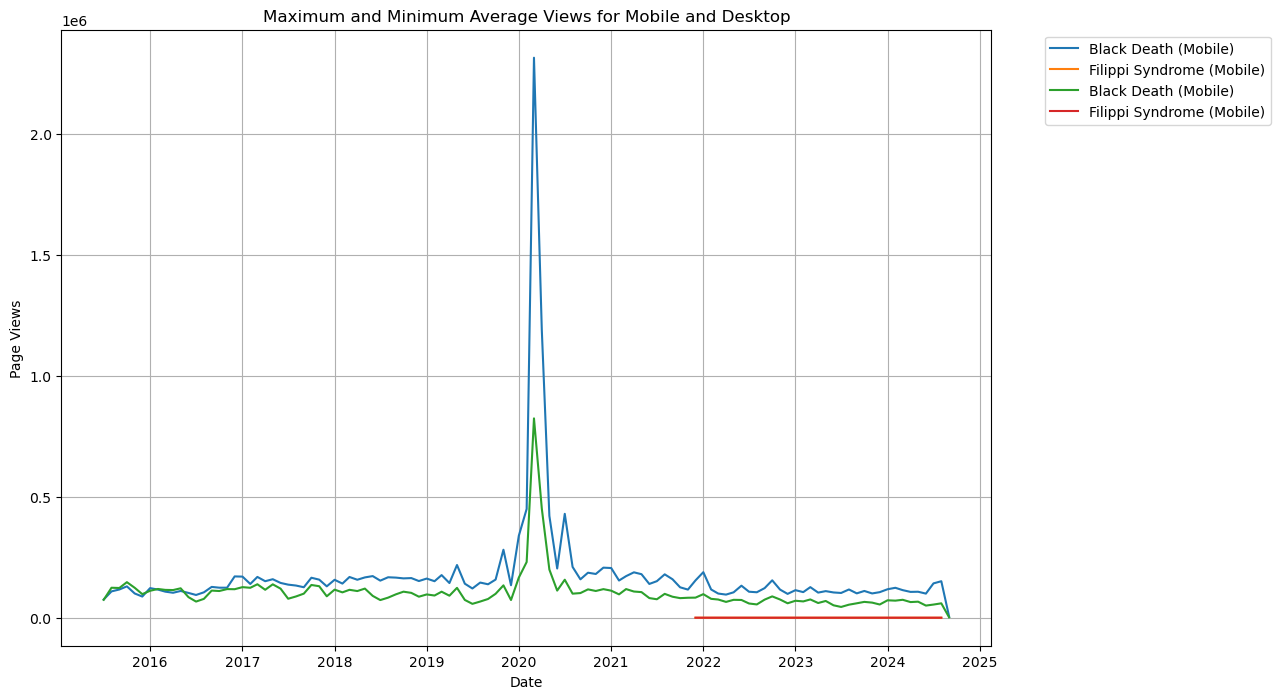

In [39]:
avg_mobile = df_mobile.groupby('article')['views'].mean()
avg_desktop = df_desktop.groupby('article')['views'].mean()

# Find max and min
max_mobile_article = avg_mobile.idxmax()
min_mobile_article = avg_mobile.idxmin()
max_desktop_article = avg_desktop.idxmax()
min_desktop_article = avg_desktop.idxmin()

plt.figure(figsize=(12, 8))

# Plot time series for max and min articles
for article, df in zip([max_mobile_article, min_mobile_article, max_desktop_article, min_desktop_article], [df_mobile, df_mobile, df_desktop, df_desktop]):
    article_df = df[df['article'] == article]
    plt.plot(article_df['date'], article_df['views'], label=f"{article} ({'Mobile' if article in [max_mobile_article, min_mobile_article] else 'Desktop'})")

plt.title('Maximum and Minimum Average Views for Mobile and Desktop')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.savefig('max_min_avg.png')
plt.show()

### Top 10 Peak Views

For both mobile and desktop, we identify the month with the highest pageview count for each article. The articles are sorted by their peak pageviews, and the top 10 articles are plotted.

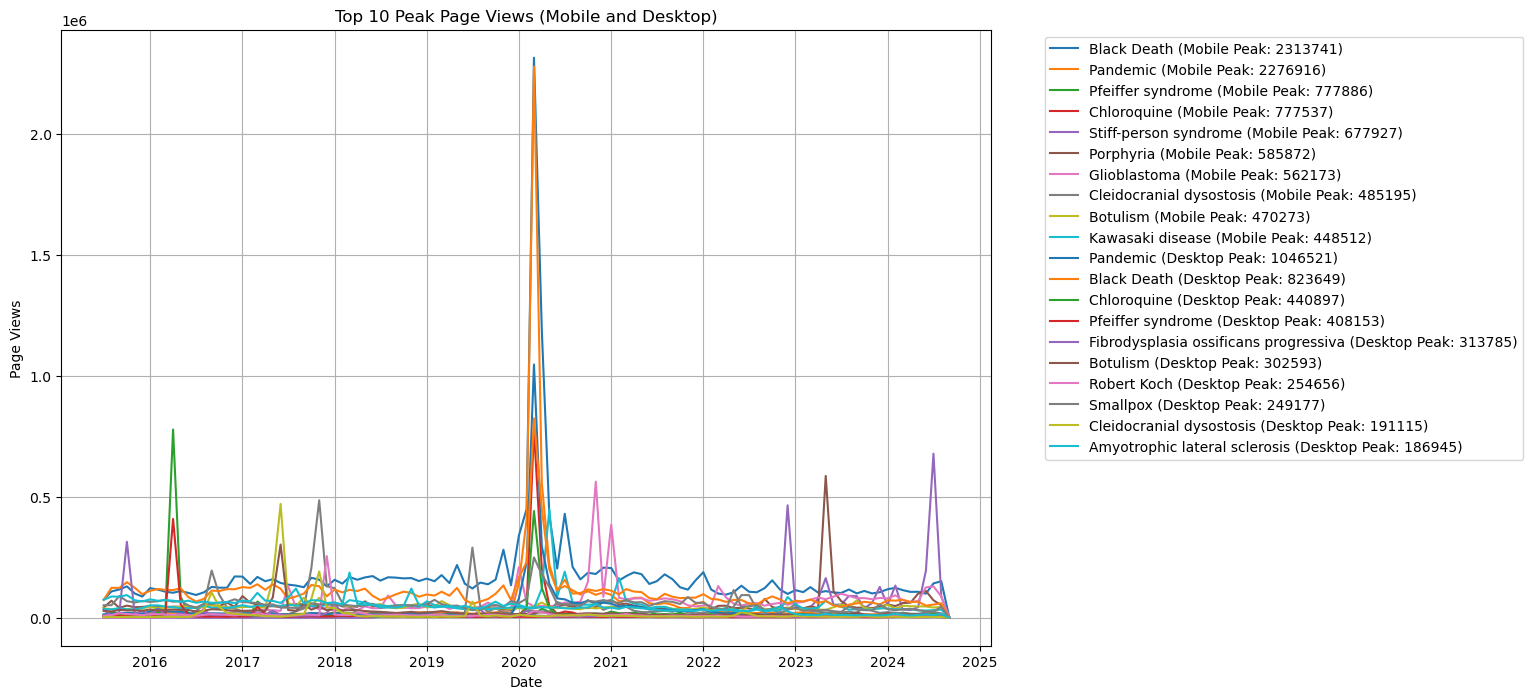

In [40]:
# Plot Top 10 Peak Page Views Graph
peak_mobile = df_mobile.groupby('article')['views'].max().nlargest(10)
peak_desktop = df_desktop.groupby('article')['views'].max().nlargest(10)

plt.figure(figsize=(12, 8))

# Plot the top 10 articles for mobile
for article in peak_mobile.index:
    article_df = df_mobile[df_mobile['article'] == article]
    peak_month = article_df.loc[article_df['views'].idxmax()]
    plt.plot(article_df['date'], article_df['views'], label=f"{article} (Mobile Peak: {peak_month['views']})")

# Plot the top 10 articles for desktop
for article in peak_desktop.index:
    article_df = df_desktop[df_desktop['article'] == article]
    peak_month = article_df.loc[article_df['views'].idxmax()]
    plt.plot(article_df['date'], article_df['views'], label=f"{article} (Desktop Peak: {peak_month['views']})")

plt.title('Top 10 Peak Page Views (Mobile and Desktop)')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.savefig('top_10_peak_page_views.png')
plt.show()

### Fewest Months of Data

We calculate how many months of data are available for each article. The 10 articles with the fewest months of data are selected and visualized.

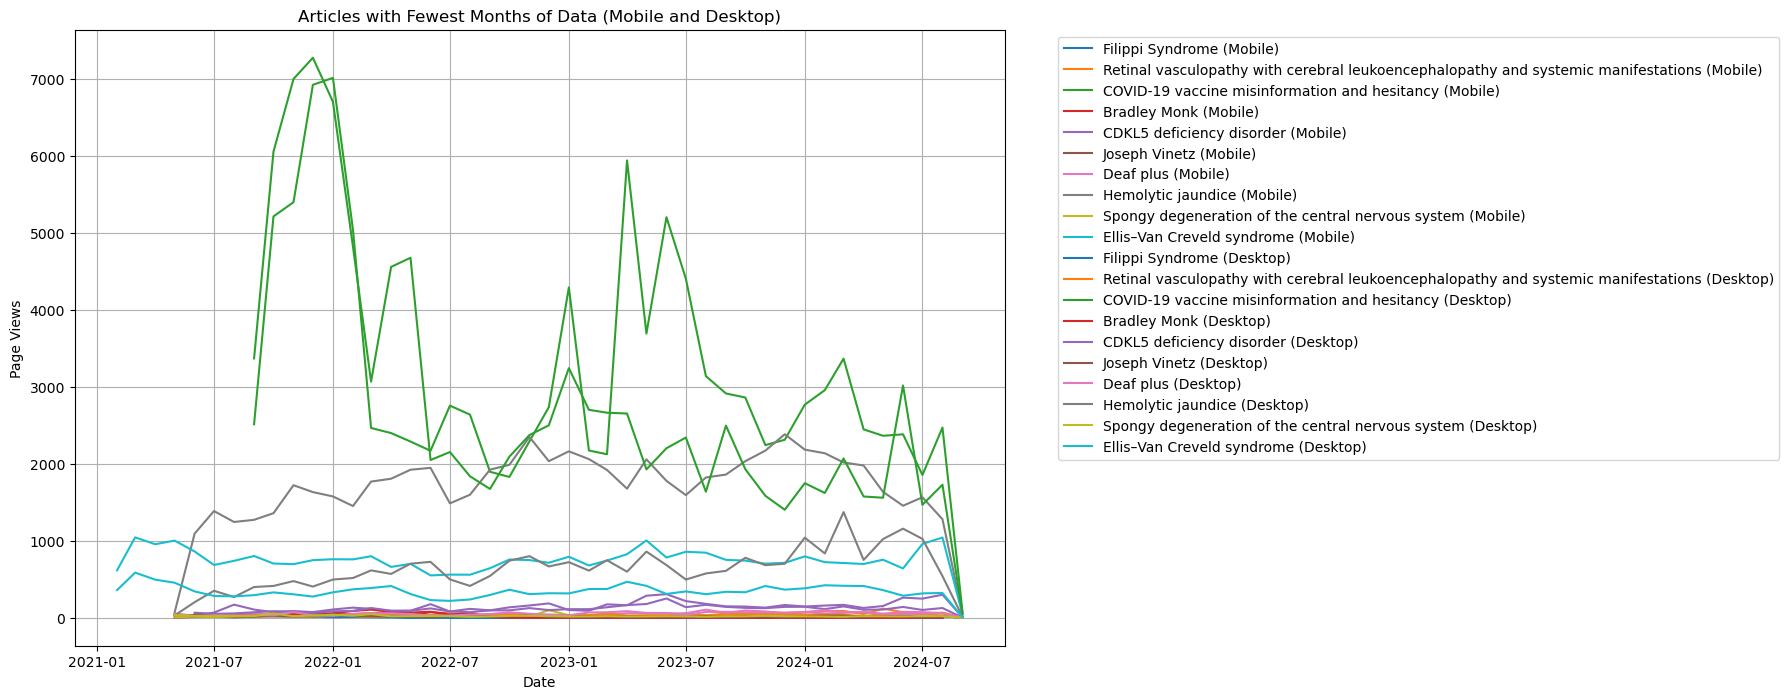

In [41]:
# Plot Fewest Months of Data Graph
    
# Count the months available for each article
mobile_months = df_mobile.groupby('article').size()
desktop_months = df_desktop.groupby('article').size()

# Find the top 10 articles with the fewest months
fewest_mobile = mobile_months.nsmallest(10)
fewest_desktop = desktop_months.nsmallest(10)

plt.figure(figsize=(12, 8))

# Plot the articles with fewest months of data for mobile
for article in fewest_mobile.index:
    article_df = df_mobile[df_mobile['article'] == article]
    plt.plot(article_df['date'], article_df['views'], label=f"{article} (Mobile)")

# Plot the articles with fewest months of data for desktop
for article in fewest_desktop.index:
    article_df = df_desktop[df_desktop['article'] == article]
    plt.plot(article_df['date'], article_df['views'], label=f"{article} (Desktop)")

plt.title('Articles with Fewest Months of Data (Mobile and Desktop)')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.savefig('fewest_months_data.png')
plt.show()

## 5. Conclusion

This project provided us with a visual analysis of Wikipedia article traffic related to rare diseases. By identifying articles with the highest and lowest average page views, the top 10 articles by peak traffic, and articles with the fewest months of data, I was able to gain insights into the traffic patterns of rare disease-related articles from July 2015 to Septemebr 2025 (~10 years)!